In [1]:
import pandas as pd

In [2]:
df = pd.read_csv(r"C:\Users\91998\Downloads\Multiple CSV\Multiple CSV\7.xor.csv",header=None)

In [3]:
df.head()

,0,1,2
0,1.764052,0.400157,-1.0
1,0.978738,2.240893,-1.0
2,1.867558,-0.977278,1.0
3,0.950088,-0.151357,1.0
4,-0.103219,0.410599,1.0


In [4]:
df[2].unique()

array([-1.,  1.])

In [5]:
x=df.iloc[:,0:2]
y=df.iloc[:,2].astype(int)

In [6]:
import seaborn as sns

<Axes: xlabel='0', ylabel='1'>

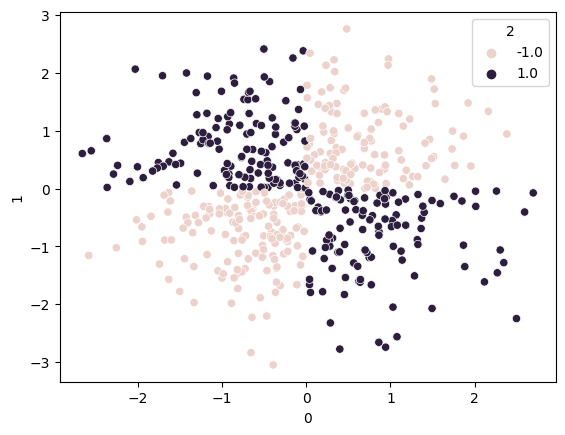

In [7]:
sns.scatterplot(data=df,x=0,y=1,hue=2)

In [8]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.1)

In [9]:
from sklearn.preprocessing import StandardScaler
std=StandardScaler()
x_trainp=std.fit_transform(x_train)
x_testp=std.transform(x_test)

In [10]:
from keras import Sequential
from keras.layers import Dense
import matplotlib.pyplot as plt
from keras.regularizers import L1,L1L2,L2
from keras.optimizers import SGD

In [11]:
model=Sequential()
model.add(Dense(22,activation="relu",kernel_regularizer=L2(0.001),bias_regularizer=L2(0.001),input_dim=2))
model.add(Dense(20,activation="relu",kernel_regularizer=L2(0.001),bias_regularizer=L2(0.001)))
model.add(Dense(18,activation="relu",kernel_regularizer=L2(0.001),bias_regularizer=L2(0.001)))
#model.add(Dense(8,activation="relu",kernel_regularizer=L2(0.001),bias_regularizer=L2(0.001)))
model.add(Dense(1,activation="sigmoid",kernel_regularizer=L2(0.001),bias_regularizer=L2(0.001)))

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 22)                66        
                                                                 
 dense_1 (Dense)             (None, 20)                460       
                                                                 
 dense_2 (Dense)             (None, 18)                378       
                                                                 
 dense_3 (Dense)             (None, 1)                 19        
                                                                 
Total params: 923 (3.61 KB)
Trainable params: 923 (3.61 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [13]:
model.compile(loss="mse",optimizer=SGD(learning_rate=0.1),metrics=["mse"])
history=model.fit(x_trainp,y_train,batch_size=10,epochs=20,validation_split=0.1)

Epoch 1/20
41/41 [==============================] - 4s 27ms/step - loss: 1.1060 - mse: 1.0589 - val_loss: 0.9745 - val_mse: 0.9267
Epoch 2/20
41/41 [==============================] - 0s 8ms/step - loss: 0.9421 - mse: 0.8932 - val_loss: 0.8537 - val_mse: 0.8029
Epoch 3/20
41/41 [==============================] - 0s 7ms/step - loss: 0.8078 - mse: 0.7554 - val_loss: 0.7276 - val_mse: 0.6735
Epoch 4/20
41/41 [==============================] - 0s 7ms/step - loss: 0.7377 - mse: 0.6822 - val_loss: 0.6920 - val_mse: 0.6353
Epoch 5/20
41/41 [==============================] - 0s 7ms/step - loss: 0.7032 - mse: 0.6456 - val_loss: 0.7085 - val_mse: 0.6500
Epoch 6/20
41/41 [==============================] - 0s 8ms/step - loss: 0.6929 - mse: 0.6336 - val_loss: 0.6479 - val_mse: 0.5880
Epoch 7/20
41/41 [==============================] - 0s 7ms/step - loss: 0.6795 - mse: 0.6190 - val_loss: 0.6696 - val_mse: 0.6086
Epoch 8/20
41/41 [==============================] - 0s 8ms/step - loss: 0.6836 - mse: 0.6

In [14]:
from mlxtend.plotting import plot_decision_regions

9600/9600 [==============================] - 33s 3ms/step


<Axes: >

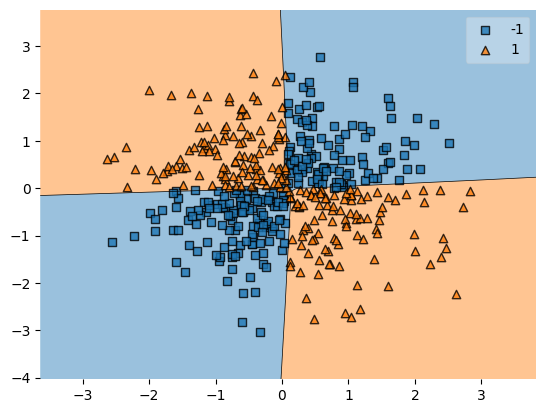

In [15]:
plot_decision_regions(x_trainp,y_train.values,clf=model)

9600/9600 [==============================] - 34s 4ms/step


<Axes: >

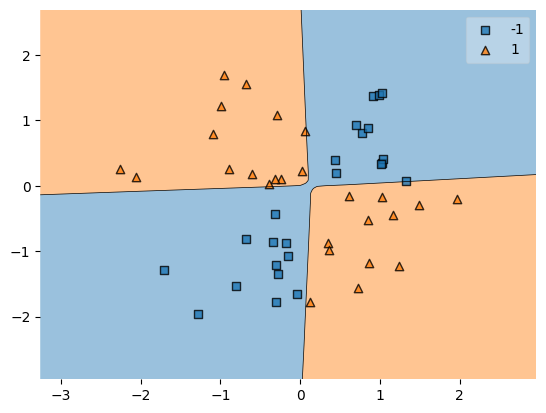

In [16]:
plot_decision_regions(x_testp,y_test.values,clf=model)